In [ ]:
from google.colab import files
f = files.upload(

)

Saving test.txt to test.txt
Saving train.txt to train.txt
Saving val.txt to val.txt


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df_train = pd.read_csv('train.txt',sep=';',names=['input','sentiments'])

In [ ]:
df_train.head()

,input,sentiments
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df_test = pd.read_csv("test.txt",sep=";",names=['input','sentiments'])

In [ ]:
df_test.head()

,input,sentiments
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
df_test['input'][2]

'i never make her separate from me because i don t ever want her to feel like i m ashamed with her'

In [ ]:
np.unique(df_train['sentiments'])

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [ ]:
df_train['sentiments'].replace('anger',0,inplace=True)
df_train['sentiments'].replace('fear',1,inplace=True)
df_train['sentiments'].replace('joy',2,inplace=True)
df_train['sentiments'].replace('love',3,inplace=True)
df_train['sentiments'].replace('sadness',4,inplace=True)
df_train['sentiments'].replace('surprise',5,inplace=True)

In [ ]:
df_train.head(15)

,input,sentiments
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
5,ive been feeling a little burdened lately wasn...,4
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,1
8,i have been with petronas for years i feel tha...,2
9,i feel romantic too,3


In [ ]:
import seaborn as sns

<Axes: xlabel='sentiments', ylabel='count'>

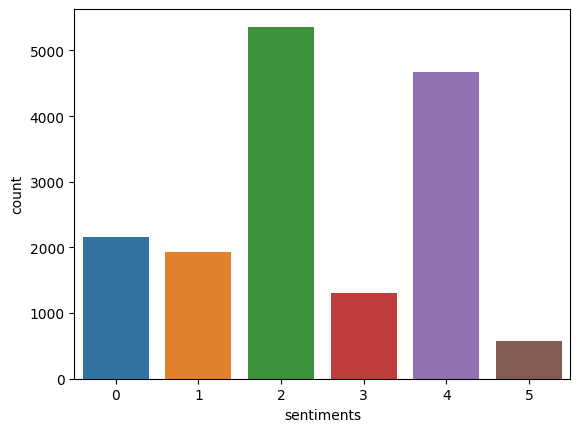

In [ ]:
sns.countplot(data=df_train,x='sentiments')

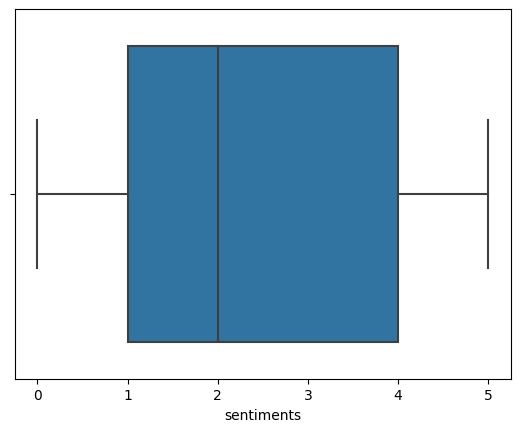

In [ ]:
sns.boxplot(data=df_train,x='sentiments');

In [ ]:
df_train.isnull().sum()

input         0
sentiments    0
dtype: int64

<Axes: xlabel='sentiments'>

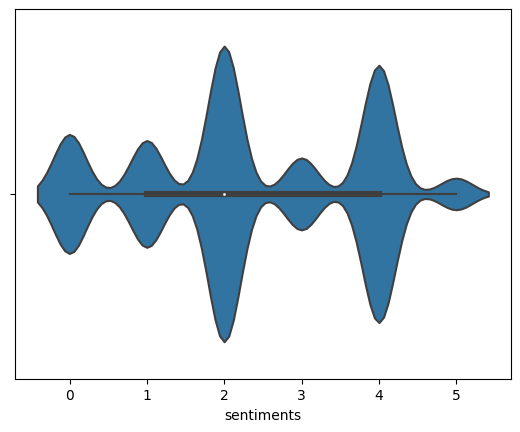

In [ ]:
sns.violinplot(df_train,x='sentiments')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   input       16000 non-null  object
 1   sentiments  16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [ ]:
df_train.describe()

,sentiments
count,16000.000000
mean,2.381063
std,1.444121
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [ ]:
df_train.shape , df_test.shape

((16000, 2), (2000, 2))

In [ ]:
x = df_train['input']
y = df_train['sentiments']

In [ ]:
x.head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: input, dtype: object

In [ ]:
y.head()

0    4
1    4
2    0
3    3
4    0
Name: sentiments, dtype: int64

In [ ]:
y.ndim

1

In [ ]:
y = np.array(y)
print(y)

[4 4 0 ... 2 0 4]


In [ ]:
message = x.copy()

In [ ]:
message[2]

'im grabbing a minute to post i feel greedy wrong'

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus= []

In [ ]:
for i in range(0,len(message)):
  x = re.sub('[^a-zA-Z]',' ',message[i])
  x = x.lower()
  x = x.split()

  x = [ps.stem(word) for word in x if not word in stopwords.words('english')]
  x = ' '.join(x)
  corpus.append(x)

In [ ]:
len(corpus)

16000

In [ ]:
corpus[1]

'go feel hopeless damn hope around someon care awak'

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
from keras.preprocessing.text import one_hot

In [ ]:
one_hot_representation = [one_hot(i,10000) for i in corpus]

In [ ]:
one_hot_representation[1]

[5300, 1351, 8950, 3963, 7775, 6999, 5384, 9521, 5093]

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
embedding = pad_sequences(one_hot_representation,maxlen=20)

In [ ]:
embedding[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 1342, 1351, 5093], dtype=int32)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,LSTM,Bidirectional

In [ ]:
from keras.src.engine import sequential
model = Sequential()


In [ ]:
model.add(Embedding(10000,40))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='relu'))


model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 40)          400000    
                                                                 
 bidirectional (Bidirection  (None, 200)               112800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 513001 (1.96 MB)
Trainable params: 513001 (1.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


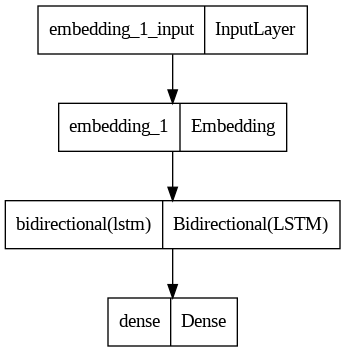

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
final_output = np.array(y)
final_input = np.array(embedding)

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(final_input,final_output,test_size=0.35)

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=31)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


336/336 [==============================] - 25s 58ms/step - loss: nan - accuracy: 0.1368 - val_loss: nan - val_accuracy: 0.1314
Epoch 2/20
336/336 [==============================] - 16s 47ms/step - loss: nan - accuracy: 0.1368 - val_loss: nan - val_accuracy: 0.1314
Epoch 3/20
336/336 [==============================] - 19s 56ms/step - loss: nan - accuracy: 0.1368 - val_loss: nan - val_accuracy: 0.1314
Epoch 4/20
336/336 [==============================] - 19s 58ms/step - loss: nan - accuracy: 0.1368 - val_loss: nan - val_accuracy: 0.1314
Epoch 5/20
336/336 [==============================] - 16s 47ms/step - loss: nan - accuracy: 0.1368 - val_loss: nan - val_accuracy: 0.1314
Epoch 6/20
336/336 [==============================] - 17s 50ms/step - loss: nan - accuracy: 0.1368 - val_loss: nan - val_accuracy: 0.1314
Epoch 7/20
336/336 [==============================] - 20s 61ms/step - loss: nan - accuracy: 0.1368 - val_loss: nan - val_accuracy: 0.1314
Epoch 8/20
336/336 [=========================

In [ ]:
model.predict(x_test)

175/175 [==============================] - 2s 12ms/step


array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)